In [52]:
import tensorflow as tf

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as K

In [54]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [55]:
from keras.utils import to_categorical

In [56]:
print('Training data shape : ', x_train.shape, y_train.shape)

print('Testing data shape : ', x_test.shape, y_test.shape)

# Find the unique numbers from the train labels
classes = np.unique(y_train)
num_classes = len(classes)
print('Total number of outputs : ', num_classes)
print('Output classes : ', num_classes)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  10


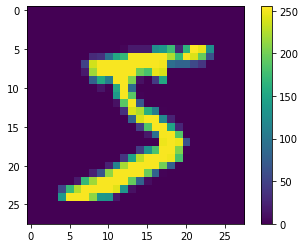

In [57]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [58]:
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [59]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [117]:
def create_model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape,name="conv_1"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(64, activation='relu',name="dense_1"))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax',name="dense_2"))
    
    return model

model1=create_model()

model1.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 28, 28, 128)       256       
_________________________________________________________________
dense_3 (Dense)              (None, 28, 28, 64)        8256      
_________________________________________________________________
dense_2 (Dense)              (None, 28, 28, 10)        650       
Total params: 9,162
Trainable params: 9,162
Non-trainable params: 0
_________________________________________________________________


In [67]:
# first training
batch_size = 512
epochs = 6

adam = keras.optimizers.Adam(lr=0.0001)
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  
    
cp_callback1 = keras.callbacks.ModelCheckpoint(filepath='weights.{epoch:02d}.h5', 
                                     save_weights_only=True, save_freq=3)

In [68]:
history1=model1.fit(x_train,y_train,batch_size=512,epochs=6,
                    validation_data=(x_test, y_test),callbacks=[cp_callback1])

Epoch 1/6
118/118 [==============================] - 6s 48ms/step - loss: 0.9440 - accuracy: 0.7486 - val_loss: 0.2235 - val_accuracy: 0.9379
Epoch 2/6
118/118 [==============================] - 6s 47ms/step - loss: 0.2240 - accuracy: 0.9343 - val_loss: 0.1445 - val_accuracy: 0.9578
Epoch 3/6
118/118 [==============================] - 6s 51ms/step - loss: 0.1478 - accuracy: 0.9578 - val_loss: 0.1035 - val_accuracy: 0.9710
Epoch 4/6
118/118 [==============================] - 6s 53ms/step - loss: 0.1232 - accuracy: 0.9637 - val_loss: 0.0869 - val_accuracy: 0.9742
Epoch 5/6
118/118 [==============================] - 7s 56ms/step - loss: 0.1010 - accuracy: 0.9699 - val_loss: 0.0770 - val_accuracy: 0.9759
Epoch 6/6
118/118 [==============================] - 7s 56ms/step - loss: 0.0894 - accuracy: 0.9735 - val_loss: 0.0702 - val_accuracy: 0.9773


In [69]:
layer_weights_model1,bias_dense_1=model1.get_layer('dense_1').get_weights()
whole_weights_model1,bias_dense_2=model1.get_layer('dense_2').get_weights()

print(layer_weights_model1.shape)
print(layer_weights_model1)

(3136, 64)
[[ 0.02642339 -0.00563927  0.03963725 ...  0.01284826 -0.01813975
  -0.02871798]
 [-0.00397728 -0.02413001 -0.01629238 ...  0.03700769 -0.02685397
  -0.01602656]
 [-0.03168412 -0.02673873 -0.01031367 ...  0.02504838  0.02933366
   0.01894133]
 ...
 [ 0.05397619  0.0375975  -0.00567571 ... -0.01938659  0.03283928
   0.04348961]
 [ 0.00033191 -0.02022113  0.03688208 ... -0.04916282  0.0015858
   0.04152755]
 [ 0.00117888  0.02939186  0.00084541 ... -0.00221105 -0.01318671
   0.04415144]]


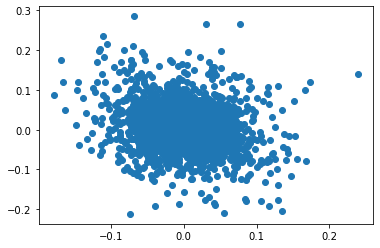

In [70]:
layer2_weight1=layer_weights_model1
plt.scatter(layer2_weight1[:,0],layer2_weight1[:,1],marker='o')

In [71]:
from keras import applications
import pandas as pd
from sklearn import decomposition
pca=decomposition.PCA()

pca.fit(layer2_weight1)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_)

[0.13318388 0.10559198 0.08489018 0.0828177  0.06528487 0.05437636
 0.05017317 0.03438487 0.03234183 0.02614047 0.01862116 0.01514461
 0.01136004 0.00944062 0.00932267 0.00894245 0.00848853 0.00777569
 0.00734519 0.00715867 0.0066753  0.00658826 0.00652398 0.00640011
 0.00618414 0.00612988 0.00609228 0.00604995 0.00601602 0.00586052
 0.00574921 0.005661   0.00562254 0.00557081 0.00547556 0.00545265
 0.00535869 0.00527451 0.00525425 0.00518248 0.00515523 0.00509245
 0.00504309 0.00501745 0.00496875 0.00489807 0.0048282  0.00480354
 0.0047657  0.00469037 0.00468257 0.00461946 0.00456106 0.00453887
 0.00445351 0.0044306  0.00439283 0.00433729 0.00427891 0.00424389
 0.00419289 0.00413413 0.00406877 0.00389533]
[0.01790243 0.01419356 0.01141084 0.01113226 0.00877552 0.00730921
 0.00674422 0.00462198 0.00434735 0.00351377 0.00250304 0.00203572
 0.001527   0.001269   0.00125314 0.00120203 0.00114102 0.0010452
 0.00098733 0.00096226 0.00089729 0.00088559 0.00087695 0.0008603
 0.00083127 0.0008

In [72]:
pca1=decomposition.PCA(n_components=2)
pca1.fit(layer2_weight1)

print(pca1.explained_variance_ratio_)
print(pca1.explained_variance_)

[0.13318396 0.1055921 ]
[0.01790244 0.01419357]


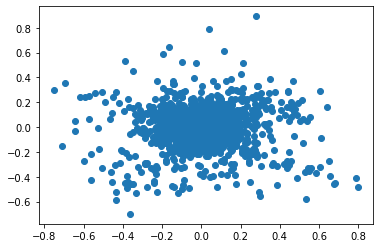

In [73]:
layer_weights1=pca1.transform(layer2_weight1)
plt.scatter(layer_weights1[:,0],layer_weights1[:,1],marker='o')
plt.show()

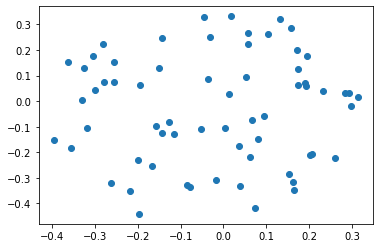

In [74]:
last_weights1=whole_weights_model1
plt.scatter(last_weights1[:,0],last_weights1[:,1],marker='o')

[0.15355709 0.14215194]
[0.06681535 0.06185276]


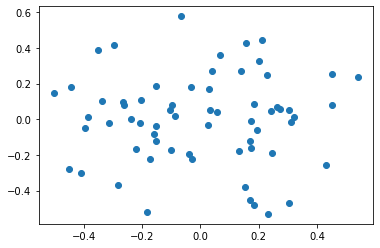

In [75]:
pca.fit(last_weights1)
pca1=decomposition.PCA(n_components=2)
pca1.fit(last_weights1)

print(pca1.explained_variance_ratio_)
print(pca1.explained_variance_)

whole_weights1=pca1.transform(last_weights1)
plt.scatter(whole_weights1[:,0],whole_weights1[:,1],marker='o')
plt.show()

In [78]:
model2=create_model()
model2.load_weights('./weights.06.h5')

adam = keras.optimizers.Adam(lr=0.0001)
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])    

print (model2.evaluate(x=x_test, y=y_test))

313/313 [==============================] - 1s 1ms/step - loss: 0.0811 - accuracy: 0.9723
[0.07024510949850082, 0.9772999882698059]


In [79]:
cp_callback2 = keras.callbacks.ModelCheckpoint(filepath='weights2.{epoch:02d}.h5', 
                                     save_weights_only=True, save_freq=3)
history2=model2.fit(x_train,y_train,batch_size=512,epochs=6,
                    validation_data=(x_test, y_test),callbacks=[cp_callback2])

Epoch 1/6
118/118 [==============================] - 6s 45ms/step - loss: 0.0827 - accuracy: 0.9748 - val_loss: 0.0631 - val_accuracy: 0.9797
Epoch 2/6
118/118 [==============================] - 6s 47ms/step - loss: 0.0716 - accuracy: 0.9780 - val_loss: 0.0594 - val_accuracy: 0.9807
Epoch 3/6
118/118 [==============================] - 6s 51ms/step - loss: 0.0652 - accuracy: 0.9793 - val_loss: 0.0549 - val_accuracy: 0.9823
Epoch 4/6
118/118 [==============================] - 6s 50ms/step - loss: 0.0608 - accuracy: 0.9813 - val_loss: 0.0549 - val_accuracy: 0.9819
Epoch 5/6
118/118 [==============================] - 6s 51ms/step - loss: 0.0561 - accuracy: 0.9826 - val_loss: 0.0524 - val_accuracy: 0.9819
Epoch 6/6
118/118 [==============================] - 7s 58ms/step - loss: 0.0524 - accuracy: 0.9834 - val_loss: 0.0501 - val_accuracy: 0.9826


In [80]:
layer_weights_model2,bias_dense_1=model2.get_layer('dense_1').get_weights()
whole_weights_model2,bias_dense_2=model2.get_layer('dense_2').get_weights()

print(layer_weights_model2.shape)
print(layer_weights_model2)

(3136, 64)
[[ 0.02642339 -0.00563927  0.03963725 ...  0.01284826 -0.01813975
  -0.02871798]
 [-0.00397728 -0.02413001 -0.01629238 ...  0.03700769 -0.02685397
  -0.01602656]
 [-0.03168412 -0.02673873 -0.01031367 ...  0.02504838  0.02933366
   0.01894133]
 ...
 [ 0.05482981  0.03466893  0.00292931 ... -0.01710866  0.01788293
   0.05475453]
 [ 0.00449569 -0.01317888  0.04716915 ... -0.05432023 -0.00638297
   0.05065188]
 [-0.00231908  0.02980752 -0.00419655 ... -0.00307419 -0.00703299
   0.03847047]]


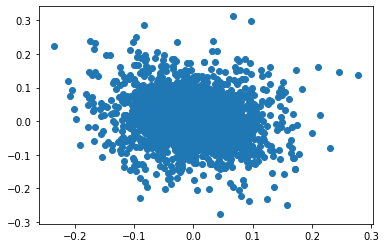

In [81]:
layer2_weight2=layer_weights_model2
plt.scatter(layer2_weight2[:,0],layer2_weight2[:,1],marker='o')

[0.12674777 0.09890758]
[0.02770006 0.02161573]


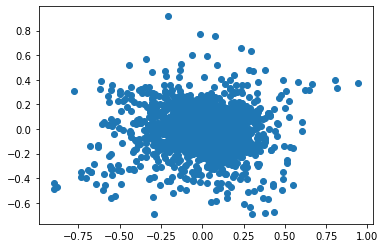

In [82]:
pca.fit(layer2_weight2)
pca1=decomposition.PCA(n_components=2)
pca1.fit(layer2_weight2)

print(pca1.explained_variance_ratio_)
print(pca1.explained_variance_)

layer_weights2=pca1.transform(layer2_weight2)
plt.scatter(layer_weights2[:,0],layer_weights2[:,1],marker='o')
plt.show()

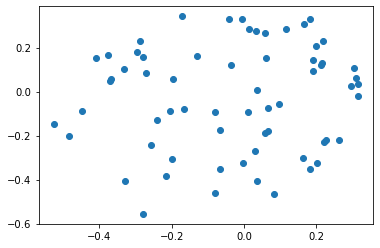

In [83]:
last_weights2=whole_weights_model2
plt.scatter(last_weights2[:,0],last_weights2[:,1],marker='o')

[0.16321069 0.14319646]
[0.08981526 0.07880138]


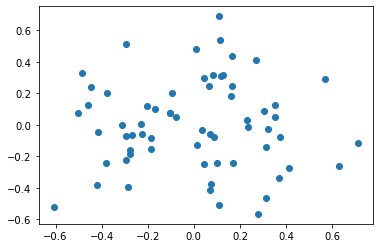

In [84]:
pca.fit(last_weights2)
pca1=decomposition.PCA(n_components=2)
pca1.fit(last_weights2)

print(pca1.explained_variance_ratio_)
print(pca1.explained_variance_)

whole_weights2=pca1.transform(last_weights2)
plt.scatter(whole_weights2[:,0],whole_weights2[:,1],marker='o')
plt.show()

In [85]:
model3=create_model()
model3.load_weights('./weights2.06.h5')

adam = keras.optimizers.Adam(lr=0.0001)
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  

cp_callback3 = keras.callbacks.ModelCheckpoint(filepath='weights3.{epoch:02d}.h5', 
                                     save_weights_only=True, save_freq=3)
history3=model3.fit(x_train,y_train,batch_size=512,epochs=6,
                    validation_data=(x_test, y_test),callbacks=[cp_callback3])

Epoch 1/6
118/118 [==============================] - 6s 48ms/step - loss: 0.0493 - accuracy: 0.9851 - val_loss: 0.0459 - val_accuracy: 0.9844
Epoch 2/6
118/118 [==============================] - 6s 49ms/step - loss: 0.0447 - accuracy: 0.9864 - val_loss: 0.0502 - val_accuracy: 0.9833
Epoch 3/6
118/118 [==============================] - 6s 51ms/step - loss: 0.0419 - accuracy: 0.9864 - val_loss: 0.0452 - val_accuracy: 0.9856
Epoch 4/6
118/118 [==============================] - 6s 50ms/step - loss: 0.0386 - accuracy: 0.9881 - val_loss: 0.0424 - val_accuracy: 0.9856
Epoch 5/6
118/118 [==============================] - 6s 50ms/step - loss: 0.0352 - accuracy: 0.9889 - val_loss: 0.0430 - val_accuracy: 0.9865
Epoch 6/6
118/118 [==============================] - 6s 52ms/step - loss: 0.0344 - accuracy: 0.9895 - val_loss: 0.0460 - val_accuracy: 0.9846


In [86]:
layer_weights_model3,bias_dense_1=model3.get_layer('dense_1').get_weights()
whole_weights_model3,bias_dense_2=model3.get_layer('dense_2').get_weights()

print(layer_weights_model3.shape)
print(layer_weights_model3)

(3136, 64)
[[ 0.02642339 -0.00563927  0.03963725 ...  0.01284826 -0.01813975
  -0.02871798]
 [-0.00397728 -0.02413001 -0.01629238 ...  0.03700769 -0.02685397
  -0.01602656]
 [-0.03168412 -0.02673873 -0.01031367 ...  0.02504838  0.02933366
   0.01894133]
 ...
 [ 0.04341807  0.03600086  0.00387509 ... -0.00339854  0.02130766
   0.03717229]
 [-0.00092478 -0.0169553   0.05014923 ... -0.05757266  0.00378392
   0.04141119]
 [ 0.00187182  0.02054584 -0.01150157 ... -0.00386056  0.0044111
   0.04693113]]


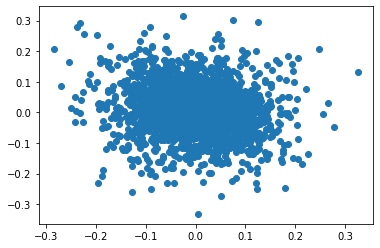

In [87]:
layer2_weight3=layer_weights_model3
plt.scatter(layer2_weight3[:,0],layer2_weight3[:,1],marker='o')

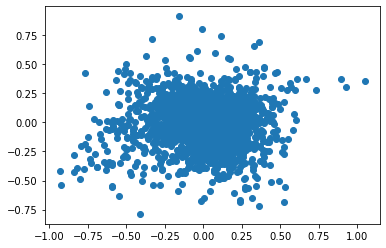

In [88]:
pca.fit(layer2_weight3)
pca1=decomposition.PCA(n_components=2)
pca1.fit(layer2_weight3)

layer_weights3=pca1.transform(layer2_weight3)
plt.scatter(layer_weights3[:,0],layer_weights3[:,1],marker='o')

plt.show()

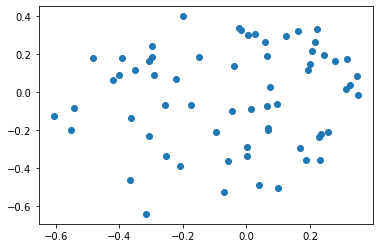

In [114]:
last_weights3=whole_weights_model3
plt.scatter(last_weights3[:,0],last_weights3[:,1],marker='o')

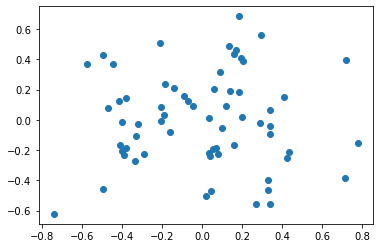

In [115]:
pca.fit(last_weights3)
pca1=decomposition.PCA(n_components=2)
pca1.fit(last_weights3)

whole_weights3=pca1.transform(last_weights3)
plt.scatter(whole_weights3[:,0],whole_weights3[:,1],marker='o')

In [91]:
model4=create_model()
model4.load_weights('./weights3.06.h5')

adam = keras.optimizers.Adam(lr=0.0001)
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  

cp_callback4 = keras.callbacks.ModelCheckpoint(filepath='weights4.{epoch:02d}.h5', 
                                     save_weights_only=True, save_freq=3)
history4=model4.fit(x_train,y_train,batch_size=512,epochs=6,
                    validation_data=(x_test, y_test),callbacks=[cp_callback4])

Epoch 1/6
118/118 [==============================] - 6s 51ms/step - loss: 0.0321 - accuracy: 0.9901 - val_loss: 0.0443 - val_accuracy: 0.9854
Epoch 2/6
118/118 [==============================] - 7s 56ms/step - loss: 0.0313 - accuracy: 0.9896 - val_loss: 0.0431 - val_accuracy: 0.9852
Epoch 3/6
118/118 [==============================] - 7s 56ms/step - loss: 0.0276 - accuracy: 0.9912 - val_loss: 0.0379 - val_accuracy: 0.9872
Epoch 4/6
118/118 [==============================] - 6s 50ms/step - loss: 0.0249 - accuracy: 0.9923 - val_loss: 0.0422 - val_accuracy: 0.9864
Epoch 5/6
118/118 [==============================] - 6s 52ms/step - loss: 0.0243 - accuracy: 0.9923 - val_loss: 0.0400 - val_accuracy: 0.9871
Epoch 6/6
118/118 [==============================] - 6s 51ms/step - loss: 0.0227 - accuracy: 0.9930 - val_loss: 0.0411 - val_accuracy: 0.9871


In [92]:
layer_weights_model4,bias_dense_1=model4.get_layer('dense_1').get_weights()
whole_weights_model4,bias_dense_2=model4.get_layer('dense_2').get_weights()

print(layer_weights_model4.shape)
print(layer_weights_model4)

(3136, 64)
[[ 0.02642339 -0.00563927  0.03963725 ...  0.01284826 -0.01813975
  -0.02871798]
 [-0.00397728 -0.02413001 -0.01629238 ...  0.03700769 -0.02685397
  -0.01602656]
 [-0.03168412 -0.02673873 -0.01031367 ...  0.02504838  0.02933366
   0.01894133]
 ...
 [ 0.03543054  0.04074349  0.01073073 ... -0.01662765  0.01677223
   0.03100414]
 [-0.02464245 -0.01189314  0.0402464  ... -0.06235114  0.00644529
   0.04893108]
 [-0.0086439   0.01749214 -0.01780412 ...  0.0054869  -0.00269533
   0.06027548]]


[0.11148994 0.088378  ]
[0.04522496 0.03584979]


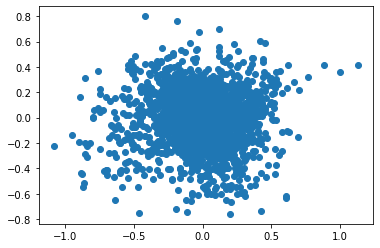

In [93]:
layer2_weight4=layer_weights_model4
pca.fit(layer2_weight4)
pca1=decomposition.PCA(n_components=2)
pca1.fit(layer2_weight4)

print(pca1.explained_variance_ratio_)
print(pca1.explained_variance_)

layer_weights4=pca1.transform(layer2_weight4)
plt.scatter(layer_weights4[:,0],layer_weights4[:,1],marker='o')
plt.show()

[0.17444272 0.14854825]
[0.13084021 0.11141814]


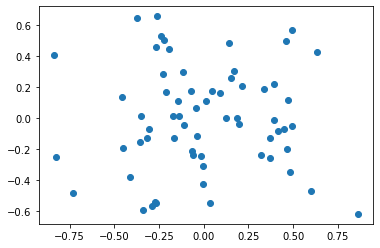

In [94]:
last_weights4=whole_weights_model4
pca.fit(last_weights4)
pca1=decomposition.PCA(n_components=2)
pca1.fit(last_weights4)

print(pca1.explained_variance_ratio_)
print(pca1.explained_variance_)

whole_weights4=pca1.transform(last_weights4)
plt.scatter(whole_weights4[:,0],whole_weights4[:,1],marker='o')
plt.show()

In [95]:
model5=create_model()
model5.load_weights('./weights4.06.h5')

adam = keras.optimizers.Adam(lr=0.0001)
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 

cp_callback5 = keras.callbacks.ModelCheckpoint(filepath='weights5.{epoch:02d}.h5', 
                                     save_weights_only=True, save_freq=3)
history5=model5.fit(x_train,y_train,batch_size=512,epochs=6,
                    validation_data=(x_test, y_test),callbacks=[cp_callback5])

Epoch 1/6
118/118 [==============================] - 6s 46ms/step - loss: 0.0224 - accuracy: 0.9923 - val_loss: 0.0413 - val_accuracy: 0.9864
Epoch 2/6
118/118 [==============================] - 6s 49ms/step - loss: 0.0226 - accuracy: 0.9923 - val_loss: 0.0408 - val_accuracy: 0.9871
Epoch 3/6
118/118 [==============================] - 6s 52ms/step - loss: 0.0197 - accuracy: 0.9938 - val_loss: 0.0417 - val_accuracy: 0.9879
Epoch 4/6
118/118 [==============================] - 6s 50ms/step - loss: 0.0186 - accuracy: 0.9944 - val_loss: 0.0418 - val_accuracy: 0.9867
Epoch 5/6
118/118 [==============================] - 6s 50ms/step - loss: 0.0175 - accuracy: 0.9945 - val_loss: 0.0448 - val_accuracy: 0.9872
Epoch 6/6
118/118 [==============================] - 6s 51ms/step - loss: 0.0167 - accuracy: 0.9945 - val_loss: 0.0403 - val_accuracy: 0.9878


In [96]:
layer_weights_model5,bias_dense_1=model5.get_layer('dense_1').get_weights()
whole_weights_model5,bias_dense_2=model5.get_layer('dense_2').get_weights()

print(layer_weights_model5.shape)
print(layer_weights_model5)

(3136, 64)
[[ 0.02642339 -0.00563927  0.03963725 ...  0.01284826 -0.01813975
  -0.02871798]
 [-0.00397728 -0.02413001 -0.01629238 ...  0.03700769 -0.02685397
  -0.01602656]
 [-0.03168412 -0.02673873 -0.01031367 ...  0.02504838  0.02933366
   0.01894133]
 ...
 [ 0.05311325  0.04551934  0.02002195 ... -0.02336048  0.03320509
   0.03861007]
 [-0.01656757 -0.02794078  0.0362976  ... -0.08478825  0.00936391
   0.03238494]
 [-0.0115317   0.01887631 -0.01685628 ...  0.00598635 -0.00396828
   0.05939164]]


[0.10649244 0.08527957]
[0.05308621 0.04251165]


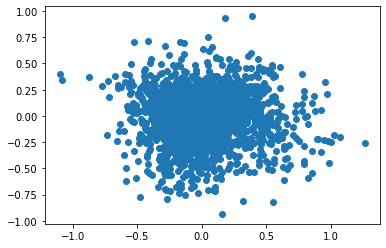

In [97]:
layer2_weight5=layer_weights_model5
pca.fit(layer2_weight5)
pca1=decomposition.PCA(n_components=2)
pca1.fit(layer2_weight5)

print(pca1.explained_variance_ratio_)
print(pca1.explained_variance_)

layer_weights5=pca1.transform(layer2_weight5)
plt.scatter(layer_weights5[:,0],layer_weights5[:,1],marker='o')
plt.show()

[0.17777054 0.1489554 ]
[0.14923914 0.1250487 ]


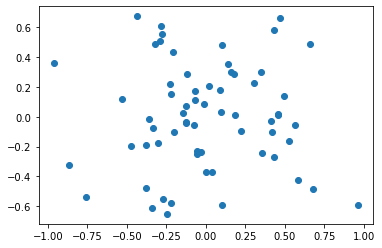

In [98]:
last_weights5=whole_weights_model5
pca.fit(last_weights5)
pca1=decomposition.PCA(n_components=2)
pca1.fit(last_weights5)

print(pca1.explained_variance_ratio_)
print(pca1.explained_variance_)

whole_weights5=pca1.transform(last_weights5)
plt.scatter(whole_weights5[:,0],whole_weights5[:,1],marker='o')
plt.show()

In [100]:
model6=create_model()
model6.load_weights('./weights5.06.h5')

adam = keras.optimizers.Adam(lr=0.0001)
model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])   

cp_callback6 = keras.callbacks.ModelCheckpoint(filepath='weights6.{epoch:02d}.h5', 
                                     save_weights_only=True, save_freq=3)
history6=model6.fit(x_train,y_train,batch_size=512,epochs=6,
                    validation_data=(x_test, y_test),callbacks=[cp_callback6])

Epoch 1/6
118/118 [==============================] - 6s 49ms/step - loss: 0.0161 - accuracy: 0.9951 - val_loss: 0.0412 - val_accuracy: 0.9878
Epoch 2/6
118/118 [==============================] - 6s 53ms/step - loss: 0.0146 - accuracy: 0.9955 - val_loss: 0.0410 - val_accuracy: 0.9877
Epoch 3/6
118/118 [==============================] - 6s 52ms/step - loss: 0.0145 - accuracy: 0.9950 - val_loss: 0.0421 - val_accuracy: 0.9874
Epoch 4/6
118/118 [==============================] - 6s 50ms/step - loss: 0.0147 - accuracy: 0.9952 - val_loss: 0.0400 - val_accuracy: 0.9881
Epoch 5/6
118/118 [==============================] - 6s 50ms/step - loss: 0.0129 - accuracy: 0.9960 - val_loss: 0.0393 - val_accuracy: 0.9880
Epoch 6/6
118/118 [==============================] - 6s 51ms/step - loss: 0.0115 - accuracy: 0.9962 - val_loss: 0.0408 - val_accuracy: 0.9879


In [101]:
layer_weights_model6,bias_dense_1=model6.get_layer('dense_1').get_weights()
whole_weights_model6,bias_dense_2=model6.get_layer('dense_2').get_weights()

print(layer_weights_model6.shape)
print(layer_weights_model6)

(3136, 64)
[[ 0.02642339 -0.00563927  0.03963725 ...  0.01284826 -0.01813975
  -0.02871798]
 [-0.00397728 -0.02413001 -0.01629238 ...  0.03700769 -0.02685397
  -0.01602656]
 [-0.03168412 -0.02673873 -0.01031367 ...  0.02504838  0.02933366
   0.01894133]
 ...
 [ 0.05636759  0.06469482  0.02149135 ... -0.03486123  0.00808858
   0.01563529]
 [ 0.00847022 -0.01595749  0.03956231 ... -0.09017765  0.0343774
   0.05257104]
 [-0.01248844  0.01939283 -0.01656722 ...  0.00600358 -0.00396828
   0.05883272]]


[0.1037256 0.0834078]
[0.06102334 0.04907007]


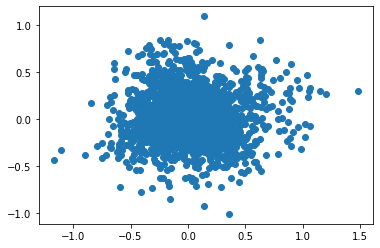

In [102]:
layer2_weight6=layer_weights_model6
pca.fit(layer2_weight6)
pca1=decomposition.PCA(n_components=2)
pca1.fit(layer2_weight6)

print(pca1.explained_variance_ratio_)
print(pca1.explained_variance_)

layer_weights6=pca1.transform(layer2_weight6)
plt.scatter(layer_weights6[:,0],layer_weights6[:,1],marker='o')
plt.show()

[0.17895296 0.15185764]
[0.16562071 0.14054404]


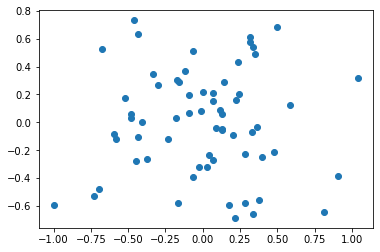

In [103]:
last_weights6=whole_weights_model6
pca.fit(last_weights6)
pca1=decomposition.PCA(n_components=2)
pca1.fit(last_weights6)

print(pca1.explained_variance_ratio_)
print(pca1.explained_variance_)

whole_weights6=pca1.transform(last_weights6)
plt.scatter(whole_weights6[:,0],whole_weights6[:,1],marker='o')
plt.show()

In [104]:
model7=create_model()
model7.load_weights('./weights6.06.h5')

adam = keras.optimizers.Adam(lr=0.0001)
model7.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])    

cp_callback7 = keras.callbacks.ModelCheckpoint(filepath='weights7.{epoch:02d}.h5', 
                                     save_weights_only=True, save_freq=3)
history7=model7.fit(x_train,y_train,batch_size=512,epochs=6,
                    validation_data=(x_test, y_test),callbacks=[cp_callback7])

Epoch 1/6
118/118 [==============================] - 6s 46ms/step - loss: 0.0119 - accuracy: 0.9964 - val_loss: 0.0447 - val_accuracy: 0.9875
Epoch 2/6
118/118 [==============================] - 6s 50ms/step - loss: 0.0116 - accuracy: 0.9966 - val_loss: 0.0421 - val_accuracy: 0.9875
Epoch 3/6
118/118 [==============================] - 6s 51ms/step - loss: 0.0110 - accuracy: 0.9966 - val_loss: 0.0435 - val_accuracy: 0.9880
Epoch 4/6
118/118 [==============================] - 6s 53ms/step - loss: 0.0101 - accuracy: 0.9967 - val_loss: 0.0428 - val_accuracy: 0.9871
Epoch 5/6
118/118 [==============================] - 6s 54ms/step - loss: 0.0091 - accuracy: 0.9968 - val_loss: 0.0398 - val_accuracy: 0.9879
Epoch 6/6
118/118 [==============================] - 6s 53ms/step - loss: 0.0113 - accuracy: 0.9962 - val_loss: 0.0427 - val_accuracy: 0.9877


In [105]:
layer_weights_model7,bias_dense_1=model7.get_layer('dense_1').get_weights()
whole_weights_model7,bias_dense_2=model7.get_layer('dense_2').get_weights()

print(layer_weights_model7.shape)
print(layer_weights_model7)

(3136, 64)
[[ 0.02642339 -0.00563927  0.03963725 ...  0.01284826 -0.01813975
  -0.02871798]
 [-0.00397728 -0.02413001 -0.01629238 ...  0.03700769 -0.02685397
  -0.01602656]
 [-0.03168412 -0.02673873 -0.01031367 ...  0.02504838  0.02933366
   0.01894133]
 ...
 [ 0.03120933  0.0462659  -0.00382417 ... -0.01297617  0.01166091
   0.01545088]
 [ 0.01034412 -0.03039932  0.02386423 ... -0.0738373   0.04921538
   0.04211928]
 [-0.01257971  0.019437   -0.01654016 ...  0.00602817 -0.00396828
   0.05882397]]


[0.10091763 0.08178458]
[0.06813662 0.05521854]


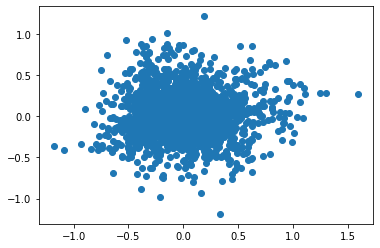

In [106]:
layer2_weight7=layer_weights_model7
pca.fit(layer2_weight7)
pca1=decomposition.PCA(n_components=2)
pca1.fit(layer2_weight7)

print(pca1.explained_variance_ratio_)
print(pca1.explained_variance_)

layer_weights7=pca1.transform(layer2_weight7)
plt.scatter(layer_weights7[:,0],layer_weights7[:,1],marker='o')
plt.show()

[0.17865638 0.1517281 ]
[0.17912337 0.1521247 ]


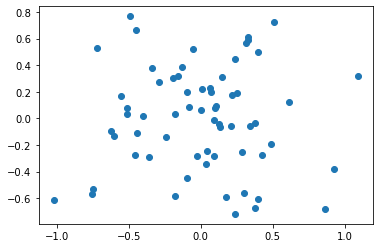

In [107]:
last_weights7=whole_weights_model7
pca.fit(last_weights7)
pca1=decomposition.PCA(n_components=2)
pca1.fit(last_weights7)

print(pca1.explained_variance_ratio_)
print(pca1.explained_variance_)

whole_weights7=pca1.transform(last_weights7)
plt.scatter(whole_weights7[:,0],whole_weights7[:,1],marker='o')
plt.show()

In [108]:
model8=create_model()
model8.load_weights('./weights7.06.h5')

adam = keras.optimizers.Adam(lr=0.0001)
model8.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])   

cp_callback8 = keras.callbacks.ModelCheckpoint(filepath='weights8.{epoch:02d}.h5', 
                                     save_weights_only=True, save_freq=3)
history8=model8.fit(x_train,y_train,batch_size=512,epochs=6,
                    validation_data=(x_test, y_test),callbacks=[cp_callback8])

Epoch 1/6
118/118 [==============================] - 7s 52ms/step - loss: 0.0095 - accuracy: 0.9971 - val_loss: 0.0410 - val_accuracy: 0.9880
Epoch 2/6
118/118 [==============================] - 7s 56ms/step - loss: 0.0095 - accuracy: 0.9971 - val_loss: 0.0436 - val_accuracy: 0.9883
Epoch 3/6
118/118 [==============================] - 6s 54ms/step - loss: 0.0085 - accuracy: 0.9971 - val_loss: 0.0456 - val_accuracy: 0.9875
Epoch 4/6
118/118 [==============================] - 6s 51ms/step - loss: 0.0077 - accuracy: 0.9975 - val_loss: 0.0408 - val_accuracy: 0.9887
Epoch 5/6
118/118 [==============================] - 6s 52ms/step - loss: 0.0083 - accuracy: 0.9973 - val_loss: 0.0447 - val_accuracy: 0.9880
Epoch 6/6
118/118 [==============================] - 6s 50ms/step - loss: 0.0069 - accuracy: 0.9978 - val_loss: 0.0432 - val_accuracy: 0.9878


In [109]:
layer_weights_model8,bias_dense_1=model8.get_layer('dense_1').get_weights()
whole_weights_model8,bias_dense_2=model8.get_layer('dense_2').get_weights()

print(layer_weights_model8.shape)
print(layer_weights_model8)

(3136, 64)
[[ 0.02642339 -0.00563927  0.03963725 ...  0.01284826 -0.01813975
  -0.02871798]
 [-0.00397728 -0.02413001 -0.01629238 ...  0.03700769 -0.02685397
  -0.01602656]
 [-0.03168412 -0.02673873 -0.01031367 ...  0.02504838  0.02933366
   0.01894133]
 ...
 [ 0.0268201   0.02197972 -0.01241143 ... -0.01311269  0.03203523
   0.00736415]
 [ 0.00511249 -0.0211207   0.0274487  ... -0.08441218  0.03363029
   0.04543437]
 [-0.01260063  0.01944374 -0.0165372  ...  0.00603724 -0.00398031
   0.05883517]]


[0.09780271 0.08161972]
[0.07458236 0.06224154]


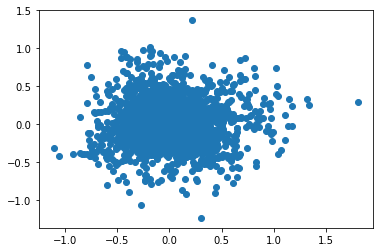

In [110]:
layer2_weight8=layer_weights_model8
pca.fit(layer2_weight8)
pca1=decomposition.PCA(n_components=2)
pca1.fit(layer2_weight8)

print(pca1.explained_variance_ratio_)
print(pca1.explained_variance_)

layer_weights8=pca1.transform(layer2_weight8)
plt.scatter(layer_weights8[:,0],layer_weights8[:,1],marker='o')
plt.show()

[0.1784955 0.1543648]
[0.1923061  0.16630836]


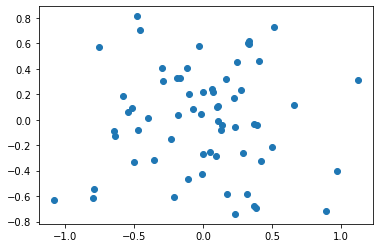

In [111]:
last_weights8=whole_weights_model8
pca.fit(last_weights8)
pca1=decomposition.PCA(n_components=2)
pca1.fit(last_weights8)

print(pca1.explained_variance_ratio_)
print(pca1.explained_variance_)

whole_weights8=pca1.transform(last_weights8)
plt.scatter(whole_weights8[:,0],whole_weights8[:,1],marker='o')
plt.show()

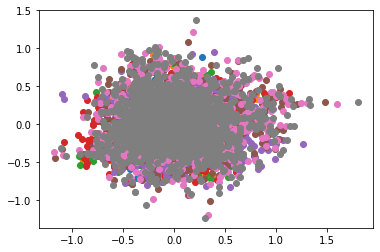

In [120]:
plt.scatter(layer_weights1[:,0],layer_weights1[:,1],marker='o')
plt.scatter(layer_weights2[:,0],layer_weights2[:,1],marker='o')
plt.scatter(layer_weights3[:,0],layer_weights3[:,1],marker='o')
plt.scatter(layer_weights4[:,0],layer_weights4[:,1],marker='o')
plt.scatter(layer_weights5[:,0],layer_weights5[:,1],marker='o')
plt.scatter(layer_weights6[:,0],layer_weights6[:,1],marker='o')
plt.scatter(layer_weights7[:,0],layer_weights7[:,1],marker='o')
plt.scatter(layer_weights8[:,0],layer_weights8[:,1],marker='o')
plt.savefig("CNN_visualize_layer.png")

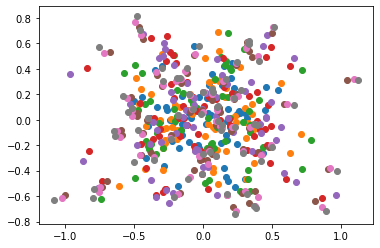

In [121]:
plt.scatter(whole_weights1[:,0],whole_weights1[:,1],marker='o')
plt.scatter(whole_weights2[:,0],whole_weights2[:,1],marker='o')
plt.scatter(whole_weights3[:,0],whole_weights3[:,1],marker='o')
plt.scatter(whole_weights4[:,0],whole_weights4[:,1],marker='o')
plt.scatter(whole_weights5[:,0],whole_weights5[:,1],marker='o')
plt.scatter(whole_weights6[:,0],whole_weights6[:,1],marker='o')
plt.scatter(whole_weights7[:,0],whole_weights7[:,1],marker='o')
plt.scatter(whole_weights8[:,0],whole_weights8[:,1],marker='o')
plt.savefig("CNN_visualize_model.png")